Example & data from https://github.com/jhlch/ds-for-telco

In [39]:
import pandas as pd
from sklearn.cross_validation import train_test_split
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow.contrib.learn as skflow
from sklearn import datasets, metrics

tf.reset_default_graph()

In [40]:
data = pd.read_csv('churn.all', header=None, names=['state', 'account_length', 'area_code', 'phone_number',
                                                   'international_plan', 'voice_mail_plan', 'number_vmail_messages',
                                                   'total_day_minutes', 'total_day_calls',
                                                    'total_day_charge',
                                                    'total_eve_minutes',
                                                    'total_eve_calls',
                                                    'total_eve_charge',
                                                    'total_night_minutes',
                                                    'total_night_calls',
                                                    'total_night_charge',
                                                    'total_intl_minutes',
                                                    'total_intl_calls',
                                                    'total_intl_charge',
                                                    'number_customer_service_calls',
                                                    'churned'                                                   
                                                   ])

In [41]:
data.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [42]:
def prepare_data(data):
    X = data[["account_length", "number_vmail_messages", "total_day_calls",
                        "total_day_charge", "total_eve_calls", "total_eve_charge",
                        "total_night_calls", "total_intl_calls", "total_intl_charge", "international_plan"]]
    
    X['international_plan'] = X['international_plan'].apply(lambda d : 1 if d == ' yes' else 0)
    Y = data[['churned']]
    Y['is_churned'] = data['churned'].apply(lambda l : 1 if l ==' True.' else 0)
    #Y['not_churned'] = data['churned'].apply(lambda l : 1 if l == ' False.' else 0)
    Y = Y.drop('churned', axis=1)
    
    X = X.astype(float)
    #Y = Y.astype(int)
    X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.5)
   
    return X_train, X_test, y_train, y_test

X_train, X_test, Y_train, Y_test = prepare_data(data)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
X_train.head()

,account_length,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_intl_calls,total_intl_charge,international_plan
1097,57.0,29.0,121.0,47.58,109.0,18.96,94.0,2.0,3.51,0.0
2737,109.0,0.0,143.0,31.30,105.0,17.99,116.0,2.0,2.67,0.0
4615,98.0,23.0,98.0,28.71,117.0,19.24,96.0,3.0,3.86,0.0
3739,109.0,0.0,104.0,33.22,91.0,17.42,95.0,4.0,3.78,0.0
2114,123.0,0.0,85.0,44.35,103.0,14.32,91.0,5.0,3.59,0.0


In [28]:
X_test.head()

,account_length,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_intl_calls,total_intl_charge,international_plan
3095,181.0,27.0,93.0,32.35,127.0,21.17,82.0,4.0,2.86,0.0
2844,161.0,0.0,100.0,29.48,74.0,18.16,69.0,4.0,3.11,0.0
1423,127.0,28.0,117.0,16.30,131.0,13.56,132.0,3.0,2.81,1.0
3475,65.0,0.0,89.0,37.04,101.0,20.30,105.0,4.0,1.78,0.0
506,136.0,31.0,88.0,24.33,65.0,20.11,120.0,5.0,3.08,0.0


In [44]:
Y_train.head(20)

,is_churned
2241,0
4469,0
4908,0
2893,0
1055,0
1360,0
1255,0
3872,0
3542,0
2348,0


In [30]:
Y_test.head()

,is_churned
3095,0
2844,0
1423,0
3475,0
506,0


In [31]:
numFeatures = X_train.shape[1]
# numLabels = number of classes we are predicting (here just 2: Ham or Spam)
numLabels = Y_train.shape[1]


In [45]:
classifier = skflow.TensorFlowLinearClassifier(n_classes=2, steps=500, batch_size=128)
classifier.fit(X_train.as_matrix(), Y_train.as_matrix())

TensorFlowLinearClassifier(steps=500, batch_size=128)

In [46]:
score = metrics.accuracy_score(Y_test, classifier.predict(X_test))
print("Accuracy: %f" % score)

Accuracy: 0.852800


In [47]:
score

0.8528

In [48]:
data = classifier.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Churned', 'Not churned'], rotation=45)
    plt.yticks(tick_marks, ['Churned', 'Not churned'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm = confusion_matrix(Y_test, data)

In [49]:
cm

array([[2148,    0],
       [ 352,    0]])

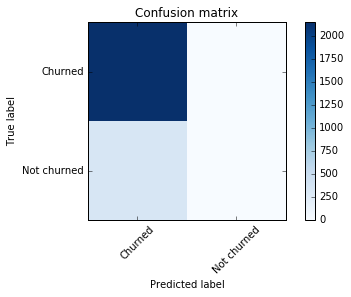

In [50]:
plot_confusion_matrix(cm)

In [19]:
classifier = skflow.TensorFlowDNNClassifier(hidden_units=[16], n_classes=2)
classifier.fit(X_train, Y_train)
score = metrics.accuracy_score(Y_test, classifier.predict(X_test))
print("Accuracy: %f" % score)

Accuracy: 0.852000


In [20]:
cm = confusion_matrix(Y_test, classifier.predict(X_test))
    

In [21]:
cm

array([[2016,  123],
       [ 247,  114]])

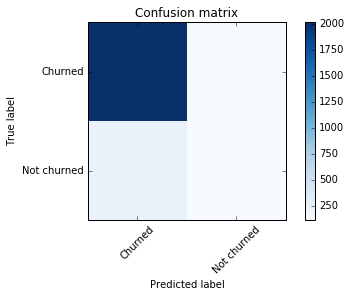

In [22]:
plot_confusion_matrix(cm)